In [1]:
import os
import cv2

In [2]:
features = []
target = []
for x in ['without_mask','with_mask']:
    ImagesNamesList = os.listdir("C:\\Users\\HP\\Desktop\\Face_Mask_Detection\\MaskData\\" + x)
    for y in ImagesNamesList:
        imgarr = cv2.imread("C:\\Users\\HP\\Desktop\\Face_Mask_Detection\\MaskData\\" + x + "\\" + y)
        try:
            imgarr = cv2.resize(imgarr,(100,100)) # Resizing images which can be resized
            features.append(imgarr)
        except:
            pass
        else:
            if x == 'without_mask':
                target.append(0)
            else:
                target.append(1)
        
    print("In Folder", x)

In Folder without_mask
In Folder with_mask


In [3]:
import numpy as np

In [4]:
features = np.array(features)

In [5]:
target = np.array(target)

In [6]:
features.shape

(3810, 100, 100, 3)

In [7]:
target.shape 

(3810,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2)

In [10]:
features_train.shape

(3048, 100, 100, 3)

In [11]:
target_train.shape

(3048,)

In [12]:
features_test.shape

(762, 100, 100, 3)

In [13]:
target_test.shape

(762,)

In [1]:
def preprocessing(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # Convert colored image to black and white
    image = image/255
    return image

In [15]:
features_train = np.array(list(map(preprocessing,features_train)))

In [16]:
features_train = features_train.reshape(3048,100,100,1)

In [17]:
features_test = np.array(list(map(preprocessing,features_test)))

In [18]:
features_test = features_test.reshape(762,100,100,1)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
dataGen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [21]:
dataGen.fit(features_train)

In [22]:
batches = dataGen.flow(features_train,target_train,batch_size=20)

In [23]:
images,labels = next(batches)

In [24]:
import matplotlib.pyplot as plt

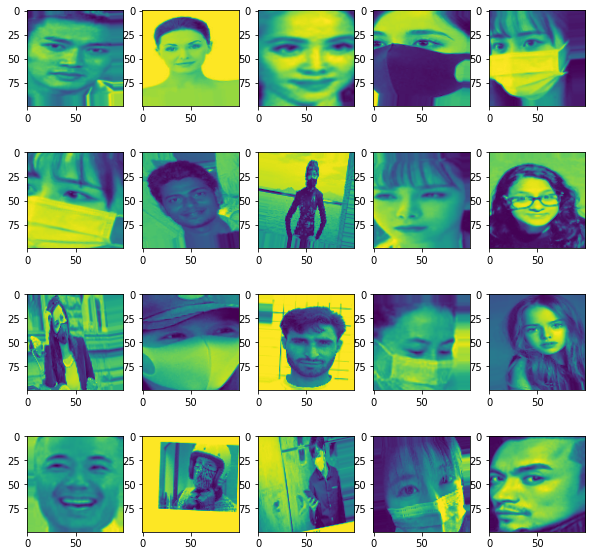

In [25]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(100,100))

plt.show()

## One-hot-encoding to increase the number of output layers by increasing the number of neurons in output layer

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
target_train=to_categorical(target_train)

In [28]:
target_train.shape

(3048, 2)

In [29]:
target_test=to_categorical(target_test)

In [30]:
target_test.shape

(762, 2)

In [31]:
features_train.shape

(3048, 100, 100, 1)

In [32]:
features_test.shape

(762, 100, 100, 1)

# Step 1: Specify the architecture

In [33]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(100,100,1))) #Parameters: number of filters, filter-size, activation function, input shape of input layer
model.add(Conv2D(60,(3,3),activation="relu"))
#MaxPooling helps to reduce the size of the edge which helps in faster computation
model.add(MaxPooling2D((2,2))) # Size of the window
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5)) # Dropout 50% of the 500 neurons before the output layer
model.add(Flatten())
#actual neurons start here
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax")) # 2 neurons in output layer

# Step 2: Compile the model

In [35]:
from tensorflow.keras.optimizers import Adam

In [36]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: Train the model


In [37]:
model.fit(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

Epoch 1/20
153/153 [==============================] - 8s 35ms/step - loss: 0.6288 - accuracy: 0.6345 1s - l
Epoch 2/20
153/153 [==============================] - 5s 31ms/step - loss: 0.5202 - accuracy: 0.7274
Epoch 3/20
153/153 [==============================] - 5s 31ms/step - loss: 0.4387 - accuracy: 0.7904
Epoch 4/20
153/153 [==============================] - 5s 31ms/step - loss: 0.3784 - accuracy: 0.8304
Epoch 5/20
153/153 [==============================] - 5s 31ms/step - loss: 0.3232 - accuracy: 0.8635
Epoch 6/20
153/153 [==============================] - 5s 31ms/step - loss: 0.3080 - accuracy: 0.8766
Epoch 7/20
153/153 [==============================] - 5s 31ms/step - loss: 0.2875 - accuracy: 0.8829
Epoch 8/20
153/153 [==============================] - 5s 31ms/step - loss: 0.2567 - accuracy: 0.8927
Epoch 9/20
153/153 [==============================] - 5s 31ms/step - loss: 0.2604 - accuracy: 0.8934
Epoch 10/20
153/153 [==============================] - 5s 31ms/step - loss: 0.2245 -

# Step 4: Predict the model


In [2]:
from keras.models import model_from_json

In [39]:
model_json = model.to_json()
with open('MaskData.json',"w") as abc:
    abc.write(model_json)
    abc.close
    
model.save_weights("MaskData.h5")
print("Save the Model")

Save the Model


In [3]:
json_file = open('MaskData.json','r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('MaskData.h5')
print("Loaded Model Successfully")

Loaded Model Successfully


In [3]:
import numpy as np
import cv2

def getClassName(classNo):
    if classNo == 0: return 'Without Mask'
    elif classNo == 1: return 'With Mask'

In [4]:
capt = cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)
capt.open(0)

True

In [ ]:
while True:
    cv2.startWindowThread()
    message,image = capt.read()
    imagearr = np.asarray(image)
    face_cascade = cv2.CascadeClassifier("C:\\Users\\HP\\anaconda3\\envs\\tf-gpu\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(imagearr,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.05,1)
    for (x,y,w,h) in faces:
        try:
            detectedFace = image[x:x+w,y:y+h]
            detectedFace = cv2.resize(detectedFace,(100,100))
            detectedFace = preprocessing(detectedFace)
            detectedFace = detectedFace.reshape(1,100,100,1)
            predictions = loaded_model.predict(detectedFace)
            classIndex = np.argmax(predictions,axis=1)
            probabilityValue = np.amax(predictions)
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
            if probabilityValue>0.75:
                cv2.putText(image,getClassName(classIndex),(x,y-3),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
                cv2.putText(image,str(int(probabilityValue * 100)) + " %",(x+w+80,y-3),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        
        except Exception as e:
            print(str(e))
        
        cv2.imshow("Model Prediction",image)
        returnedValue = cv2.waitKey(1)
        if returnedValue == ord('s') or returnedValue == ord('S'):
            cv2.destroyAllWindows()
            break

name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not 

name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not 

name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not defined
name 'preprocessing' is not 